In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.style.use('seaborn-colorblind')

**Importando os dados de treino e teste

In [8]:
train = pd.read_csv('train.csv')
train.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
test = pd.read_csv("test.csv")
test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')


**Analise Exploratória e Seleção de Features
Verificar se as colunas do dataset de teste estão no dataset de treino

In [14]:
train = train[['NU_INSCRICAO', 'NU_NOTA_MT','CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]

*NU_NOTA_MT CONHECENDO

In [15]:
train.query('NU_NOTA_MT == 0').shape[1]

44

In [16]:
teste = train.query('NU_NOTA_MT != 0')
teste['NU_NOTA_MT'].describe()

count    10123.000000
mean       482.974563
std         98.716334
min        320.500000
25%        409.000000
50%        461.200000
75%        537.700000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

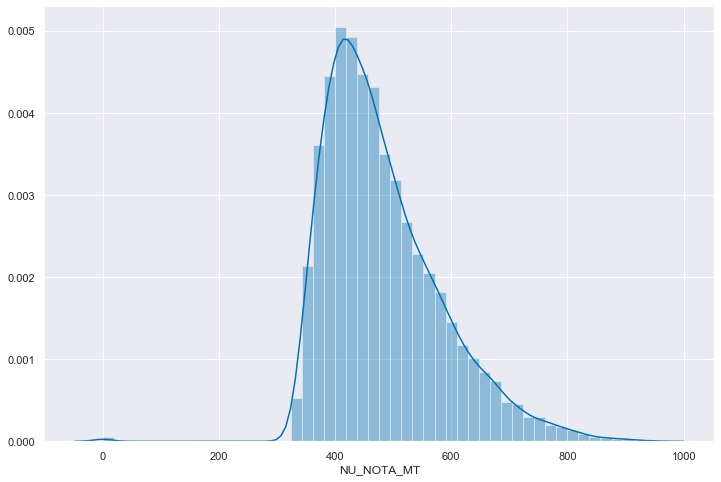

In [17]:
sns.distplot(train['NU_NOTA_MT']);

In [18]:

print("Skewness: %f" % train['NU_NOTA_MT'].skew())
print("Kurtosis: %f" % train['NU_NOTA_MT'].kurt())

Skewness: 0.920690
Kurtosis: 1.422503


***trabalhando com os floats

In [21]:
floats = train[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
                     'NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_IDADE']]

pd.DataFrame({'tipos':floats.dtypes, 
              'missing':floats.isna().sum()/floats.shape[0]*100})

,tipos,missing
NU_NOTA_COMP1,float64,26.198106
NU_NOTA_COMP2,float64,26.198106
NU_NOTA_COMP3,float64,26.198106
NU_NOTA_COMP4,float64,26.198106
NU_NOTA_COMP5,float64,26.198106
NU_NOTA_REDACAO,float64,26.198106
NU_NOTA_MT,float64,26.198106
NU_NOTA_CN,float64,24.683176
NU_NOTA_CH,float64,24.683176
NU_NOTA_LC,float64,26.198106


In [22]:
aux = train[['TP_PRESENCA_CN','NU_NOTA_MT','NU_NOTA_CN']]
aux.query('TP_PRESENCA_CN == 0').head()

,TP_PRESENCA_CN,NU_NOTA_MT,NU_NOTA_CN
2,0,NaN,NaN
3,0,NaN,NaN
4,0,NaN,NaN
9,0,NaN,NaN
13,0,NaN,NaN


In [23]:
train[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO',
            'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']].describe()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
count,10133.000000,10341.000000,10341.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,482.497928,473.495155,529.661087,516.472841,529.048258,119.811704,111.915918,106.824238,113.123951,77.372446
std,99.826323,71.093674,73.726344,68.688190,154.294758,29.846017,33.737588,34.341349,33.480033,43.067140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,408.900000,419.900000,480.400000,468.100000,440.000000,120.000000,100.000000,80.000000,100.000000,40.000000
50%,461.200000,459.800000,532.000000,520.900000,540.000000,120.000000,120.000000,120.000000,120.000000,80.000000
75%,537.600000,514.500000,581.200000,564.900000,600.000000,140.000000,120.000000,120.000000,120.000000,100.000000
max,952.000000,806.400000,807.000000,763.600000,1000.000000,200.000000,200.000000,200.000000,200.000000,200.000000


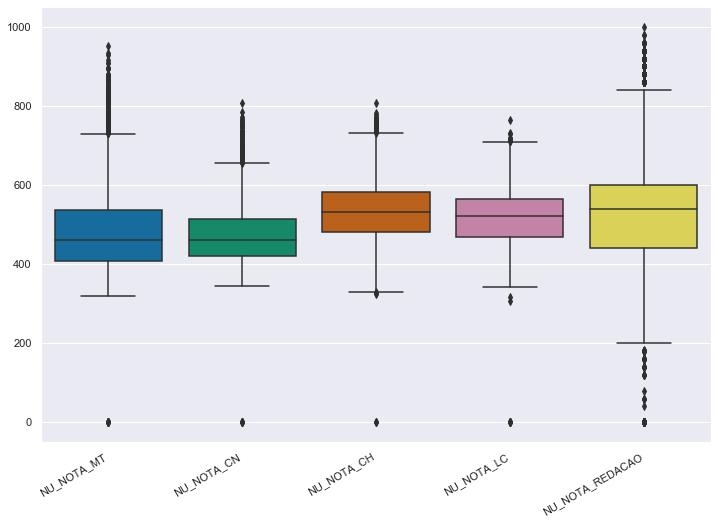

In [24]:
sns.boxplot(data=train[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']])
plt.xticks(rotation=30,ha='right');

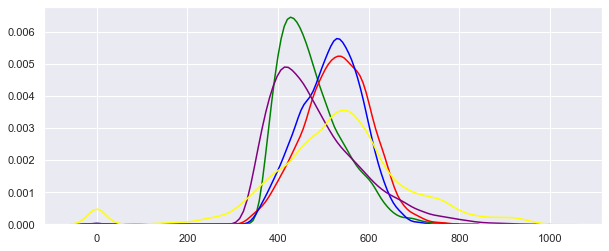

In [25]:

plt.figure(figsize=(10,4))
sns.distplot(train['NU_NOTA_CN'].dropna(), hist=False, color='green')
sns.distplot(train['NU_NOTA_CH'].dropna(), hist=False, color='red')
sns.distplot(train['NU_NOTA_LC'].dropna(), hist=False, color='blue')
sns.distplot(train['NU_NOTA_MT'].dropna(), hist=False, color='purple')
sns.distplot(train['NU_NOTA_REDACAO'].dropna(), hist=False, color='yellow')
plt.xlabel("")
plt.show()

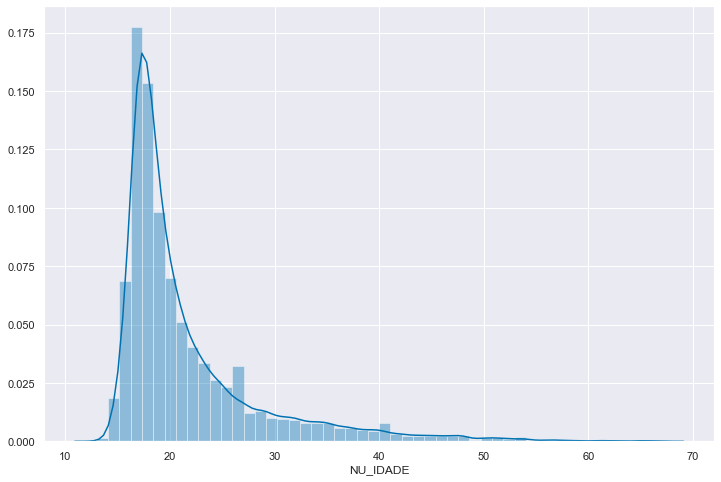

In [26]:
sns.distplot(train['NU_IDADE'])

In [27]:
#correlação das features com 'NU_NOTA_MT'
correlacao=floats.corr()
print(correlacao['NU_NOTA_MT'])

NU_NOTA_COMP1      0.299402
NU_NOTA_COMP2      0.335638
NU_NOTA_COMP3      0.350307
NU_NOTA_COMP4      0.342282
NU_NOTA_COMP5      0.343337
NU_NOTA_REDACAO    0.379376
NU_NOTA_MT         1.000000
NU_NOTA_CN         0.584941
NU_NOTA_CH         0.529594
NU_NOTA_LC         0.494695
NU_IDADE          -0.061485
Name: NU_NOTA_MT, dtype: float64


In [29]:
train_copy = train.copy()

***BASELINE

In [30]:
bl = train_copy[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]
bl.fillna(-1, inplace=True)

C:\Users\katia Alves Bezerra\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [31]:
bl_y = bl['NU_NOTA_MT']
bl_x = bl.drop('NU_NOTA_MT', axis=1)

bl_x_train, bl_x_val, bl_y_train, bl_y_val = train_test_split(bl_x, bl_y, test_size=0.25, random_state=42)

In [32]:
random_forest = RandomForestRegressor(criterion='mse', max_depth=8, n_jobs=-1, random_state=0)
random_forest.fit(bl_x_train, bl_y_train)

bl_y_pred = random_forest.predict(bl_x_val)

mae=metrics.mean_absolute_error(bl_y_val, bl_y_pred)
rmse=np.sqrt(metrics.mean_squared_error(bl_y_val, bl_y_pred))

print(mae,rmse)

42.79835733296909 63.666383396200004


In [33]:

X_test = test[bl_x.columns]

X_test.fillna(-1, inplace=True)

C:\Users\katia Alves Bezerra\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [34]:
y_pred = random_forest.predict(X_test)

In [36]:
bl_answer = pd.DataFrame({'NU_INSCRICAO': test.NU_INSCRICAO,'TP_PRESENCA_CN':test.TP_PRESENCA_CN,'NU_NOTA_MT':y_pred})

bl_answer.head()

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,429.902832
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,449.784444
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,590.592048
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,-1.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,525.820565


In [37]:
tamanho = bl_answer.shape[0]
tamanho

4576

In [38]:
i=3

for i in range(0,tamanho):
    if (bl_answer.iloc[i:1+i,1:2] == 0).bool(): #ver os ausentes
        bl_answer.iloc[i:1+i,2:3] = np.nan
        i+=3

bl_answer.head()


,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,429.902832
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,449.784444
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,590.592048
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,525.820565


In [39]:
bl_answer.NU_NOTA_MT.describe()

count    3442.000000
mean      470.292177
std        98.591920
min        -1.000000
25%       436.556340
50%       457.645338
75%       501.222360
max       869.685594
Name: NU_NOTA_MT, dtype: float64

****TRabalhando com categorias

In [40]:
train.columns

Index(['NU_INSCRICAO', 'NU_NOTA_MT', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047'],
      dtype='object')

In [41]:
categorias_dig = train[['NU_NOTA_MT','TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 
                              'Q027', 'Q047']]

In [42]:
categorias_dig.isna().sum().sort_values(ascending= False).head(3)

Q027          7373
NU_NOTA_MT    3597
Q047             0
dtype: int64

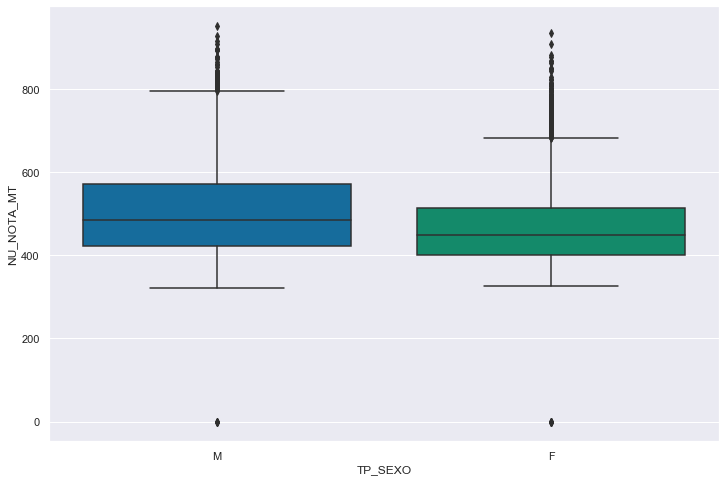

In [47]:

sns.boxplot(categorias_dig.TP_SEXO, categorias_dig.NU_NOTA_MT)


***OBS: Todos os 'TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047' influenciam a nota de matemática pelos boxplot!!!

***OBS2: Q027 muitos nulos

In [49]:
categorias_num = train[['NU_NOTA_MT', 'CO_UF_RESIDENCIA',
       'NU_IDADE', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO','TP_LINGUA', 'TP_STATUS_REDACAO']]

In [51]:

categorias_num.TP_ANO_CONCLUIU.value_counts()

0     7206
1     1578
10    1167
2     1033
3      712
4      563
6      383
5      379
7      294
8      221
9      194
Name: TP_ANO_CONCLUIU, dtype: int64

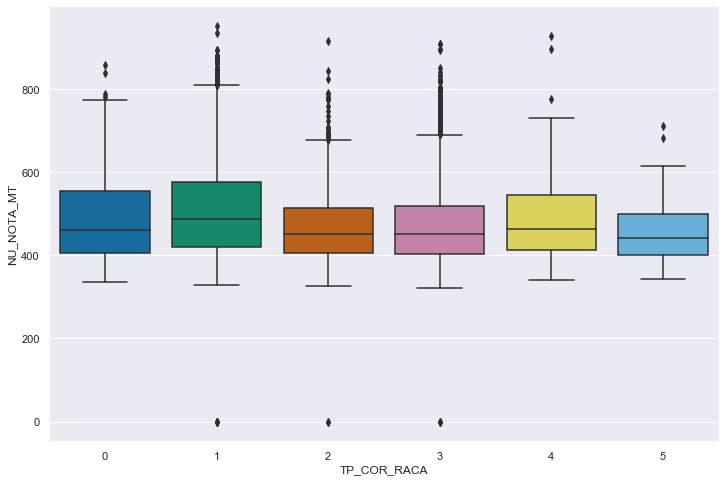

In [53]:
sns.boxplot(categorias_num.TP_COR_RACA, categorias_num.NU_NOTA_MT);

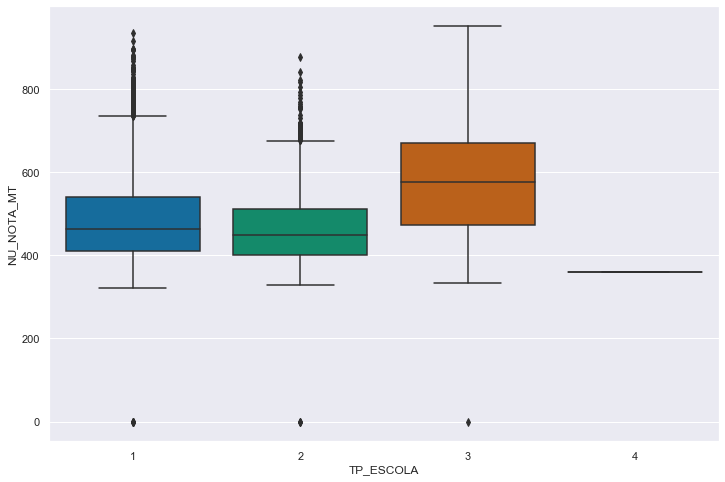

In [54]:
sns.boxplot(categorias_num.TP_ESCOLA, categorias_num.NU_NOTA_MT);

***FORMANDO O DATAFRAME

In [55]:
df_train = train[['NU_NOTA_MT', 'NU_IDADE', 'TP_COR_RACA','TP_ESCOLA','TP_LINGUA',
                       'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO',
                       'TP_SEXO','Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']]

df_train.head()

,NU_NOTA_MT,NU_IDADE,TP_COR_RACA,TP_ESCOLA,TP_LINGUA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_SEXO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,399.4,24,1,1,1,436.3,495.4,581.2,520.0,M,D,D,C,A,A,C,A
1,459.8,17,3,2,1,474.5,544.1,599.0,580.0,F,A,A,B,A,A,A,A
2,NaN,21,3,1,1,NaN,NaN,NaN,NaN,F,D,D,C,A,A,A,A
3,NaN,25,0,1,0,NaN,NaN,NaN,NaN,F,H,E,E,C,B,C,D
4,NaN,28,2,1,1,NaN,NaN,NaN,NaN,M,E,D,C,A,A,B,A


In [56]:
df_train['TP_SEXO'] = df_train['TP_SEXO'].map({'F':0, 'M':1}) 

df_train['TP_COR_RACA'] = df_train['TP_COR_RACA'].map({0:'Outros', 6:'Outros', 1:'Branca', 2:'Outros', 
                                                       3:'Outros', 4:'Branca', 5:'Outros'})

df_train['TP_ESCOLA'] = df_train['TP_ESCOLA'].map({1:'Outras', 2:'Outras', 3:'Privada', 4:'Outras'})

C:\Users\katia Alves Bezerra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\katia Alves Bezerra\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\katia Alves Bezerra\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [57]:
df_train = pd.get_dummies(df_train)

In [58]:
(df_train.isna().sum()/df_train.shape[0]*100).sort_values(ascending = False).head(6)

NU_NOTA_MT         26.198106
NU_NOTA_LC         26.198106
NU_NOTA_REDACAO    26.198106
NU_NOTA_CN         24.683176
NU_NOTA_CH         24.683176
Q002_C              0.000000
dtype: float64

In [59]:
df_train.fillna(-1, inplace = True)

In [60]:
df_train.head()

,NU_NOTA_MT,NU_IDADE,TP_LINGUA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_SEXO,TP_COR_RACA_Branca,TP_COR_RACA_Outros,...,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,399.4,24,1,436.3,495.4,581.2,520.0,1,1,0,...,1,0,0,0,1,1,0,0,0,0
1,459.8,17,1,474.5,544.1,599.0,580.0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
2,-1.0,21,1,-1.0,-1.0,-1.0,-1.0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
3,-1.0,25,0,-1.0,-1.0,-1.0,-1.0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,-1.0,28,1,-1.0,-1.0,-1.0,-1.0,1,0,1,...,1,0,0,1,0,1,0,0,0,0


In [61]:
print('obtenho', df_train.shape[1],'features')

obtenho 60 features


In [62]:
y = df_train['NU_NOTA_MT']
X = df_train.drop('NU_NOTA_MT', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:

random_forest = RandomForestRegressor(criterion='mse', max_depth=8, n_jobs=-1, random_state=0)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_val)

mae=metrics.mean_absolute_error(y_val, y_pred)
rmse=np.sqrt(metrics.mean_squared_error(y_val, y_pred))

print(mae,rmse)

41.80873787070085 62.05905467231355


In [65]:
X_test = test[['NU_IDADE', 'TP_COR_RACA','TP_ESCOLA','TP_LINGUA',
                    'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO',
                    'TP_SEXO','Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']]

X_test['TP_SEXO'] = X_test['TP_SEXO'].map({'F':0, 'M':1}) 

X_test['TP_COR_RACA'] = X_test['TP_COR_RACA'].map({0:'Outros', 6:'Outros', 1:'Branca', 2:'Outros', 
                                                       3:'Outros', 4:'Branca', 5:'Outros'})

X_test['TP_ESCOLA'] = X_test['TP_ESCOLA'].map({1:'Outras', 2:'Outras', 3:'Privada', 4:'Outras'})

X_test = pd.get_dummies(X_test)

X_test.fillna(-1, inplace=True)

C:\Users\katia Alves Bezerra\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\katia Alves Bezerra\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\katia Alves Bezerra\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [66]:
y_pred = random_forest.predict(X_test)

In [68]:
answer = pd.DataFrame({'NU_INSCRICAO':test.NU_INSCRICAO,
                        'TP_PRESENCA_CN':test.TP_PRESENCA_CN,
                        'NU_NOTA_MT':y_pred})
answer.head()


,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,423.631667
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,445.723752
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,586.279533
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,-1.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,555.669474


In [69]:
tamanho = answer.shape[0]
tamanho

4576

In [72]:
i=3

for i in range(0,tamanho):
    if (answer.iloc[i:1+i,1:2] == 0).bool(): #ver os ausentes
        answer.iloc[i:1+i,2:3] = np.nan
        i+=3

answer.head()


,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,423.631667
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,445.723752
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,586.279533
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,555.669474


In [73]:
answer.NU_NOTA_MT.describe()

count    3442.000000
mean      470.459213
std        99.001741
min        -1.000000
25%       436.671014
50%       458.459865
75%       500.137984
max       877.096569
Name: NU_NOTA_MT, dtype: float64